## Sales Analysis

### Importing Necessary Libraries

In [222]:
import pandas as pd
import os

#### Task 1 : Merging data from multiple CSV files into a single CSV file

In [223]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

All_Sales_Data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    All_Sales_Data = pd.concat([All_Sales_Data,df])
All_Sales_Data.to_csv('All_Sales_Data.csv',index = False)


#### Read in Updated Dataframe

In [224]:
All_Sales_Data = pd.read_csv('All_Sales_Data.csv')
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the Data

#### Drop rows of NAN

In [225]:
not_a_num_df = All_Sales_Data[All_Sales_Data.isna().any(axis = 1)]
not_a_num_df.head()

All_Sales_Data.dropna(how = 'all',inplace = True)
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'or' and Delete it

In [226]:
All_Sales_Data = All_Sales_Data[All_Sales_Data['Order Date'].str[0:2] != 'Or']

#### Convert Price and Quantity Columns to the Correct Type

In [227]:
All_Sales_Data['Quantity Ordered'] = pd.to_numeric(All_Sales_Data['Quantity Ordered'])
All_Sales_Data['Price Each'] = pd.to_numeric(All_Sales_Data['Price Each'])

#### Augment Data with Additional Columns

#### Task 2 : Add Month Column

In [228]:
All_Sales_Data['Month'] = All_Sales_Data['Order Date'].str[0:2]
All_Sales_Data['Month'] = All_Sales_Data['Month'].astype('int')
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3 : Add a Sales Value Column

In [229]:
All_Sales_Data['Sale Value'] = All_Sales_Data['Quantity Ordered']*All_Sales_Data['Price Each']
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a City Column

In [230]:
# Let's use .apply()

def get_city(address):
    return address.split(',')[1]

# The below function is necessary as there are multiple cities 
def get_state(address):
    return address.split(',')[2].split()[0]

All_Sales_Data['City'] = All_Sales_Data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")     
All_Sales_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1: What was the  best month for Sales? How much was Earned in that Month?

In [231]:
Sales_Data_ByMonth = All_Sales_Data.groupby('Month').sum()
Sales_Data_ByMonth.head()

,Quantity Ordered,Price Each,Sale Value
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


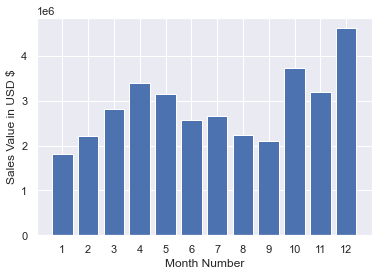

In [232]:
import matplotlib.pyplot as plt
import seaborn
#seaborn.set()

months = [month for month, df in All_Sales_Data.groupby('Month')]

plt.bar(months, Sales_Data_ByMonth['Sale Value'])
plt.xticks(months)
plt.ylabel('Sales Value in USD $')
plt.xlabel('Month Number')
plt.show()

#### Q2: What City had the highest Sales Value

In [233]:
Sales_Data_ByCity = All_Sales_Data.groupby('City').sum()
Sales_Data_ByCity

,Quantity Ordered,Price Each,Month,Sale Value
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


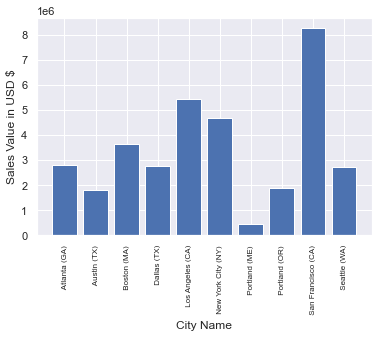

In [234]:
City = [city for city, df in All_Sales_Data.groupby('City')]

plt.bar(City, Sales_Data_ByCity['Sale Value'])
plt.xticks(City,rotation = 'vertical',size = 8)
plt.ylabel('Sales Value in USD $')
plt.xlabel('City Name')

plt.show()

#### Q3: What time should we Advertise to maximize the likelihood of customers buying the product?

In [235]:
All_Sales_Data['Order Date'] = pd.to_datetime(All_Sales_Data['Order Date'])
All_Sales_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [236]:
All_Sales_Data["Hour"] = All_Sales_Data['Order Date'].dt.hour
All_Sales_Data["Minute"] = All_Sales_Data['Order Date'].dt.minute
#All_Sales_Data['Count'] = 1
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


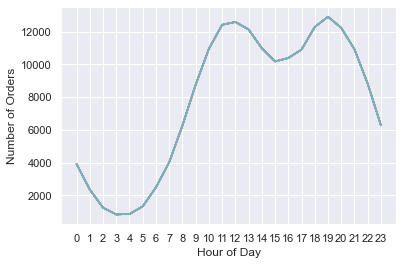

In [237]:
Hours = [hour for hour,df in All_Sales_Data.groupby('Hour')]

plt.plot(Hours, All_Sales_Data.groupby('Hour').count())
plt.xticks(Hours)
#plt.grid()

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

plt.show()

# Best time to advertise would be around 12am and 7pm

#### Q4: What products are most often sold together?

In [238]:
df = All_Sales_Data[All_Sales_Data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

D:\Softwares\Ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [239]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter() 


for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # By default we are displaying what the most commonly bought 2 items. 
                                                    # For most common n items, replace 2 by n

for key,value in (count.most_common(10)):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What product sold the most? Why do you think it sold the most?

In [240]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


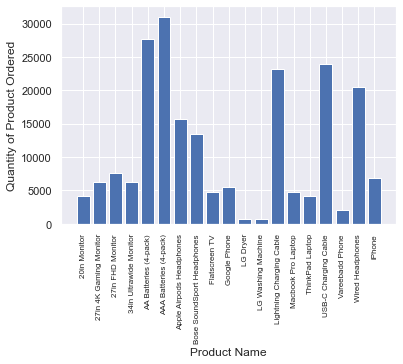

In [241]:
Sales_Data_ByProduct = All_Sales_Data.groupby('Product')

Qty_Ordered = Sales_Data_ByProduct.sum()['Quantity Ordered']
Products = [product for product, df in Sales_Data_ByProduct]

plt.bar(Products, Qty_Ordered)
plt.xticks(Products,rotation = 'vertical',size = 8)
plt.ylabel('Quantity of Product Ordered')
plt.xlabel('Product Name')

plt.show()

In [242]:
prices = All_Sales_Data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


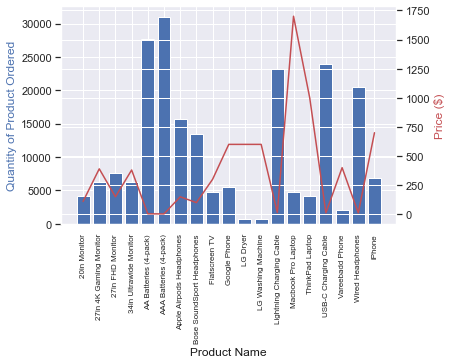

In [243]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Products, Qty_Ordered)
ax2.plot(Products,prices,'r-')

ax1.set_xlabel('Product Name',color = 'k')
ax1.set_ylabel('Quantity of Product Ordered', color = 'b')
ax2.set_ylabel('Price ($)',color = 'r')
ax1.set_xticklabels(Products, rotation = 'vertical', size = 8)

plt.show()